## The Lab:


1. Pick something else on Craigslist besides used cars: Musical instruments, roommates, antiques, etc. Look at the search page and its source code. Record which fields/data you would like to gather, and what kinds of basic EDA you'd do with it.
2. Get your search results of interest using `requests` and extract data from them using `beautifulSoup`, using code similar to what's above.
3. Wrangle your data into a dataframe and do some basic descriptions and plots. Try to find some interesting relationships or stories to tell about your data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bs4 import BeautifulSoup as soup # HTML parser
import requests # Page requests
import re # Regular expressions
import time # Time delays
import random # Random numbers

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'} 
url = 'https://richmond.craigslist.org/search/henrico-va/msa?lat=37.4392&lon=-77.3152&purveyor=owner&query=keyboard&search_distance=87#search=1~gallery~0~0' 
raw = requests.get(url, headers=header) # Get page


brands = ['yamaha', 'howard', 'roland', 'korg', 'casio', 'nord', 'kawai', 'kurzweil', 'alesis', 'arturia', 'novation',
           'moog', 'behringer', 'akai', 'm-audio', 'williams', 'studiologic', 'dexibell', 'nektar', 'cme',
             'medeli', 'samson', 'korg', 'teenage engineering', 'ik multimedia', 'native instruments', 'fatar']


bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings

In [2]:
data = [] # We'll save our listings in this object
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']
    location_element = listings[k].find('div', class_='location')
    if location_element:
        location = location_element.get_text()
    else:
        location = None  # or handle the case where the element is not found
    # Get brand from the title string:
    words = title.split()
    hits = [word for word in words if word in brands] # Find brands in the title
    if len(hits) == 0:
        brand = 'missing'
    else:
        brand = hits[0]
    
    
    #
    data.append({'title':title,'brand':brand,'price':price,'location':location,'link':link,})

In [3]:
## Wrangle the data
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
print(df.shape)
df.to_csv('craigslist_richmond_keyboards.csv')
df.head()

(49, 5)


,title,brand,price,location,link
0,fatar studio 1100 vintage master keyboard midi...,fatar,95,"\n Accokeek, MD\n ...",https://washingtondc.craigslist.org/mld/msg/d/...
1,left handed keyboard,missing,1400,\n Byrd Park\n ...,https://richmond.craigslist.org/msg/d/richmond...
2,boss loop station bass guitar keyboard vocal,missing,125,\n henrico\n ...,https://richmond.craigslist.org/msg/d/richmond...
3,kawai k4 61-key 16-bit digital synthesizer key...,kawai,375,\n Richmond\n ...,https://richmond.craigslist.org/msg/d/richmond...
4,yamaha psr-225gm port. keyboard,yamaha,135,"\n carrollton, va.\n ...",https://richmond.craigslist.org/msg/d/carrollt...


In [16]:
# Clean the location column
df['location'] = df['location'].astype(str)
df['location'].unique()
df['location'] = df['location'].str.strip().str.lower()
df['location'] = df['location'].str.replace(r'\n\s+', '', regex=True)
df['location'] = df['location'].str.replace(r',.*', '', regex=True)
df['location'] = df['location'].astype('category')
df['location'].unique()

['accokeek', 'byrd park', 'henrico', 'richmond', 'carrollton', ..., 'northside', 'newport news/hampton', 'westover hills', 'chesapeake', 'goochland']
Length: 29
Categories (29, object): ['accokeek', 'byrd park', 'carrollton', 'chesapeake', ..., 'west end', 'west end richmond', 'westover hills', 'woodbridge']

In [5]:
df['brand'].unique()

array(['fatar', 'missing', 'kawai', 'yamaha', 'casio', 'roland',
       'novation', 'nord', 'nektar', 'korg', 'akai', 'williams', 'howard',
       'm-audio'], dtype=object)

count      49.000000
mean      422.612245
std       661.888265
min         1.000000
25%        99.000000
50%       135.000000
75%       400.000000
max      3700.000000
Name: price, dtype: float64


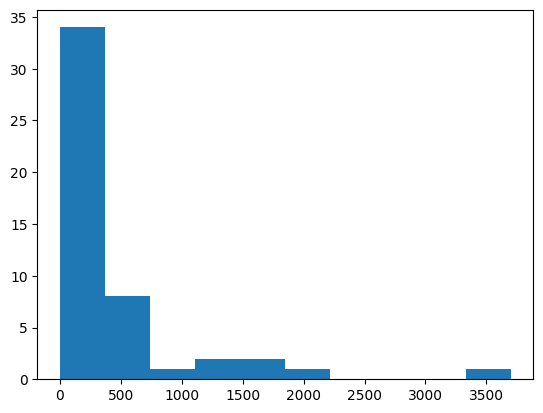

In [6]:
# EDA for price and brand:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()

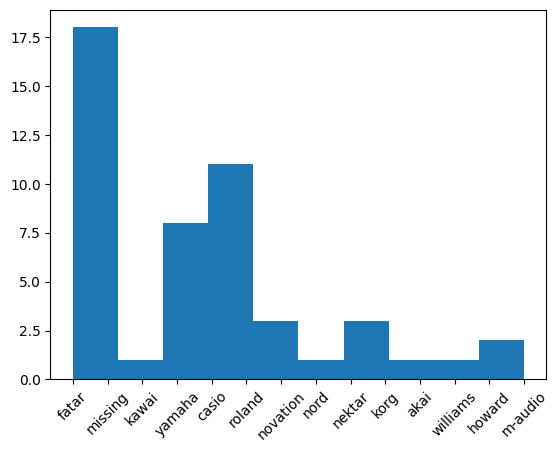

In [7]:
df['brand'].hist(grid=False)
plt.xticks(rotation=45)
plt.show()

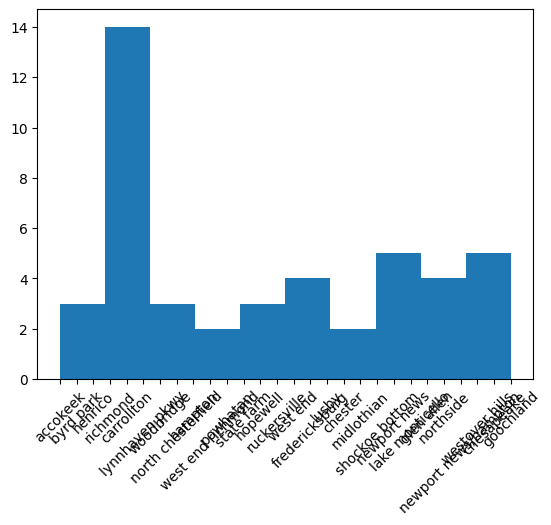

In [8]:
df['location'].hist(grid=False)
plt.xticks(rotation=45)
plt.show()

In [9]:
# Price by brand:
df.loc[:,['price','brand']].groupby('brand').describe()

price                                                            \
         count         mean         std     min     25%     50%      75%   
brand                                                                      
akai       1.0   100.000000         NaN   100.0   100.0   100.0   100.00   
casio      8.0   131.625000  135.058651    59.0    60.0    85.0   121.25   
fatar      1.0    95.000000         NaN    95.0    95.0    95.0    95.00   
howard     1.0  2000.000000         NaN  2000.0  2000.0  2000.0  2000.00   
kawai      1.0   375.000000         NaN   375.0   375.0   375.0   375.00   
korg       1.0  1500.000000         NaN  1500.0  1500.0  1500.0  1500.00   
m-audio    1.0   275.000000         NaN   275.0   275.0   275.0   275.00   
missing   17.0   297.058824  445.126874     1.0    99.0   100.0   375.00   
nektar     2.0   290.000000   14.142136   280.0   285.0   290.0   295.00   
nord       1.0  3700.000000         NaN  3700.0  3700.0  3700.0  3700.00   
novation   3.0   253.333333  205.020324    50.0   150.0   250.0   355.00   
roland     3.0   880.000000  681.689079   150.0   570.0   990.0  1245.00   
williams   1.0   450.000000         NaN   450.0   450.0   450.0   450.00   
yamaha     8.0   266.250000  169.426554    80.0   135.0   237.5   365.00   

                  
             max  
brand             
akai       100.0  
casio      459.0  
fatar       95.0  
howard    2000.0  
kawai      375.0  
korg      1500.0  
m-audio    275.0  
missing   1450.0  
nektar     300.0  
nord      3700.0  
novation   460.0  
roland    1500.0  
williams   450.0  
yamaha     575.0

In [10]:
# Price by location:
df.loc[:,['price','location']].groupby('location').describe()

C:\Users\alexl\AppData\Local\Temp\ipykernel_5436\1803437470.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.loc[:,['price','location']].groupby('location').describe()


price                                                \
                     count     mean         std     min      25%     50%   
location                                                                   
accokeek               1.0    95.00         NaN    95.0    95.00    95.0   
byrd park              1.0  1400.00         NaN  1400.0  1400.00  1400.0   
carrollton             2.0   135.00    0.000000   135.0   135.00   135.0   
chesapeake             3.0   175.00   90.138782   100.0   125.00   150.0   
chester                1.0    10.00         NaN    10.0    10.00    10.0   
fredericksburg         1.0    99.00         NaN    99.0    99.00    99.0   
glen allen             1.0  2000.00         NaN  2000.0  2000.00  2000.0   
goochland              1.0    90.00         NaN    90.0    90.00    90.0   
hampton                1.0  3700.00         NaN  3700.0  3700.00  3700.0   
henrico                1.0   125.00         NaN   125.0   125.00   125.0   
hopewell               1.0   125.00         NaN   125.0   125.00   125.0   
lake monticello        2.0     1.00    0.000000     1.0     1.00     1.0   
lusby                  2.0   799.50  990.656600    99.0   449.25   799.5   
lynnhaven pkwy         4.0    67.50    9.574271    60.0    60.00    65.0   
midlothian             1.0  1500.00         NaN  1500.0  1500.00  1500.0   
newport news           2.0   387.50   88.388348   325.0   356.25   387.5   
newport news/hampton   2.0   365.00    0.000000   365.0   365.00   365.0   
north chesterfield     1.0    50.00         NaN    50.0    50.00    50.0   
northside              1.0  1450.00         NaN  1450.0  1450.00  1450.0   
powhatan               1.0    59.00         NaN    59.0    59.00    59.0   
richmond               8.0   376.25  276.647661   100.0   242.50   337.5   
ruckersville           1.0   100.00         NaN   100.0   100.00   100.0   
shockoe bottom         1.0   100.00         NaN   100.0   100.00   100.0   
state farm             1.0   150.00         NaN   150.0   150.00   150.0   
west end               1.0   575.00         NaN   575.0   575.00   575.0   
west end richmond      1.0   400.00         NaN   400.0   400.00   400.0   
westover hills         1.0   250.00         NaN   250.0   250.00   250.0   
woodbridge             1.0   120.00         NaN   120.0   120.00   120.0   

                                       
                          75%     max  
location                               
accokeek                95.00    95.0  
byrd park             1400.00  1400.0  
carrollton             135.00   135.0  
chesapeake             212.50   275.0  
chester                 10.00    10.0  
fredericksburg          99.00    99.0  
glen allen            2000.00  2000.0  
goochland               90.00    90.0  
hampton               3700.00  3700.0  
henrico                125.00   125.0  
hopewell               125.00   125.0  
lake monticello          1.00     1.0  
lusby                 1149.75  1500.0  
lynnhaven pkwy          72.50    80.0  
midlothian            1500.00  1500.0  
newport news           418.75   450.0  
newport news/hampton   365.00   365.0  
north chesterfield      50.00    50.0  
northside             1450.00  1450.0  
powhatan                59.00    59.0  
richmond               396.25   990.0  
ruckersville           100.00   100.0  
shockoe bottom         100.00   100.0  
state farm             150.00   150.0  
west end               575.00   575.0  
west end richmond      400.00   400.0  
westover hills         250.00   250.0  
woodbridge             120.00   120.0

In [11]:
df.loc[ df['brand']=='yamaha',:]

,title,brand,price,location,link
4,yamaha psr-225gm port. keyboard,yamaha,135,carrollton,https://richmond.craigslist.org/msg/d/carrollt...
5,yamaha psr-225gm port. keyboard,yamaha,135,carrollton,https://norfolk.craigslist.org/msg/d/carrollto...
8,yamaha psr-280 portatone electronic keyboard 6...,yamaha,80,lynnhaven pkwy,https://norfolk.craigslist.org/msg/d/virginia-...
16,yamaha keyboard psr-293,yamaha,150,state farm,https://richmond.craigslist.org/msg/d/state-fa...
24,yamaha ypg-625 88-key,yamaha,575,west end,https://richmond.craigslist.org/msg/d/richmond...
41,yamaha mx-61 w/gig bag,yamaha,365,newport news/hampton,https://norfolk.craigslist.org/msg/d/newport-n...
45,yamaha mx-61 w/gig bag,yamaha,365,newport news/hampton,https://norfolk.craigslist.org/msg/d/newport-n...
48,yamaha keyboard,yamaha,325,newport news,https://norfolk.craigslist.org/msg/d/newport-n...


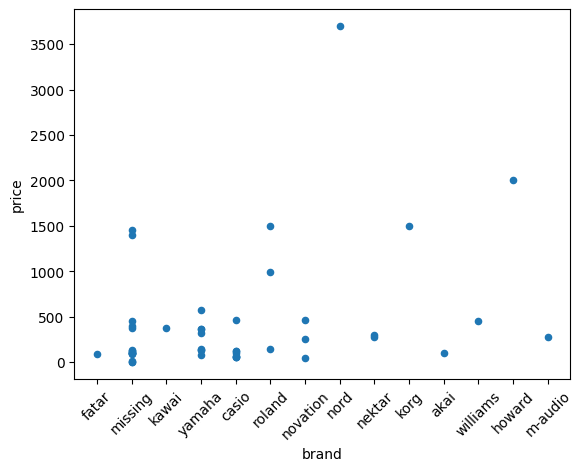

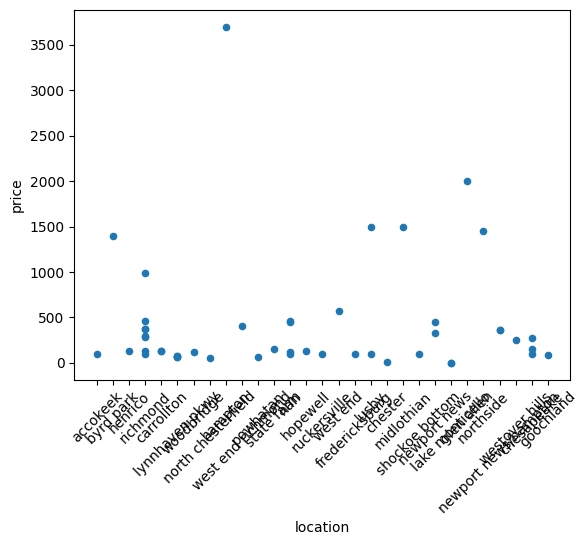

In [17]:
df.plot.scatter('brand','price')
plt.xticks(rotation=45)
plt.show()
df.plot.scatter('location','price')
plt.xticks(rotation=45)
plt.show()

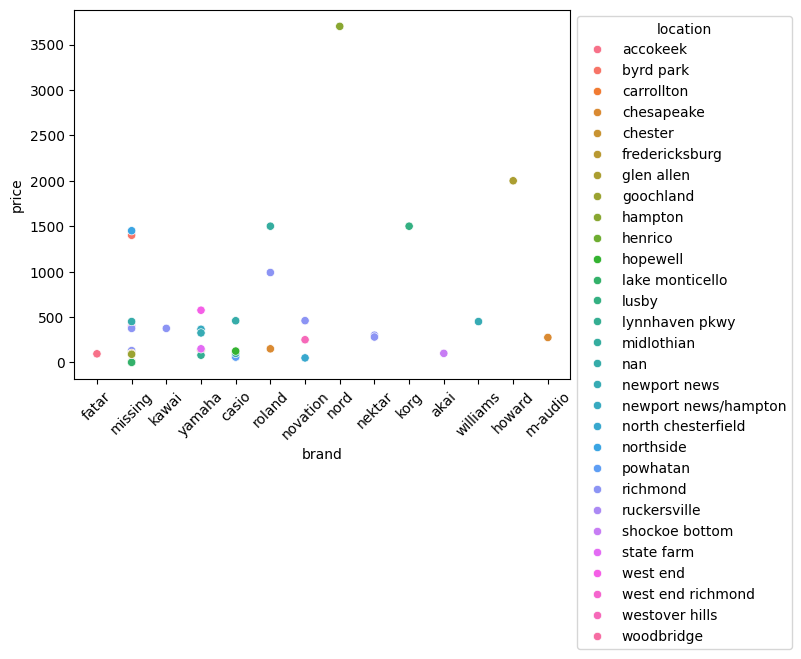

In [21]:
ax = sns.scatterplot(data=df, x='brand', y='price',hue='location')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

In [22]:
df.head()

,title,brand,price,location,link
0,fatar studio 1100 vintage master keyboard midi...,fatar,95,accokeek,https://washingtondc.craigslist.org/mld/msg/d/...
1,left handed keyboard,missing,1400,byrd park,https://richmond.craigslist.org/msg/d/richmond...
2,boss loop station bass guitar keyboard vocal,missing,125,henrico,https://richmond.craigslist.org/msg/d/richmond...
3,kawai k4 61-key 16-bit digital synthesizer key...,kawai,375,richmond,https://richmond.craigslist.org/msg/d/richmond...
4,yamaha psr-225gm port. keyboard,yamaha,135,carrollton,https://richmond.craigslist.org/msg/d/carrollt...
